# Feature Engineering

**Разбиение кабины по нескольким признакам: Deck, Cabin_Num, Cabin_Side**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df[['Deck', 'Cabin_Num', 'Cabin_Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'Cabin_Num', 'Cabin_Side']] = test_df['Cabin'].str.split('/', expand=True)

train_df['Cabin_Num'] = pd.to_numeric(train_df['Cabin_Num'], errors='coerce')
test_df['Cabin_Num'] = pd.to_numeric(test_df['Cabin_Num'], errors='coerce')

train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0])
test_df['Group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0])

train_df['Total_Spend'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_df['Total_Spend'] = test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

train_df[['Cabin', 'Deck', 'Cabin_Num', 'Cabin_Side', 'PassengerId', 'Group', 'Total_Spend']].head()

,Cabin,Deck,Cabin_Num,Cabin_Side,PassengerId,Group,Total_Spend
0,B/0/P,B,0.0,P,0001_01,0001,0.0
1,F/0/S,F,0.0,S,0002_01,0002,736.0
2,A/0/S,A,0.0,S,0003_01,0003,10383.0
3,A/0/S,A,0.0,S,0003_02,0003,5176.0
4,F/1/S,F,1.0,S,0004_01,0004,1091.0


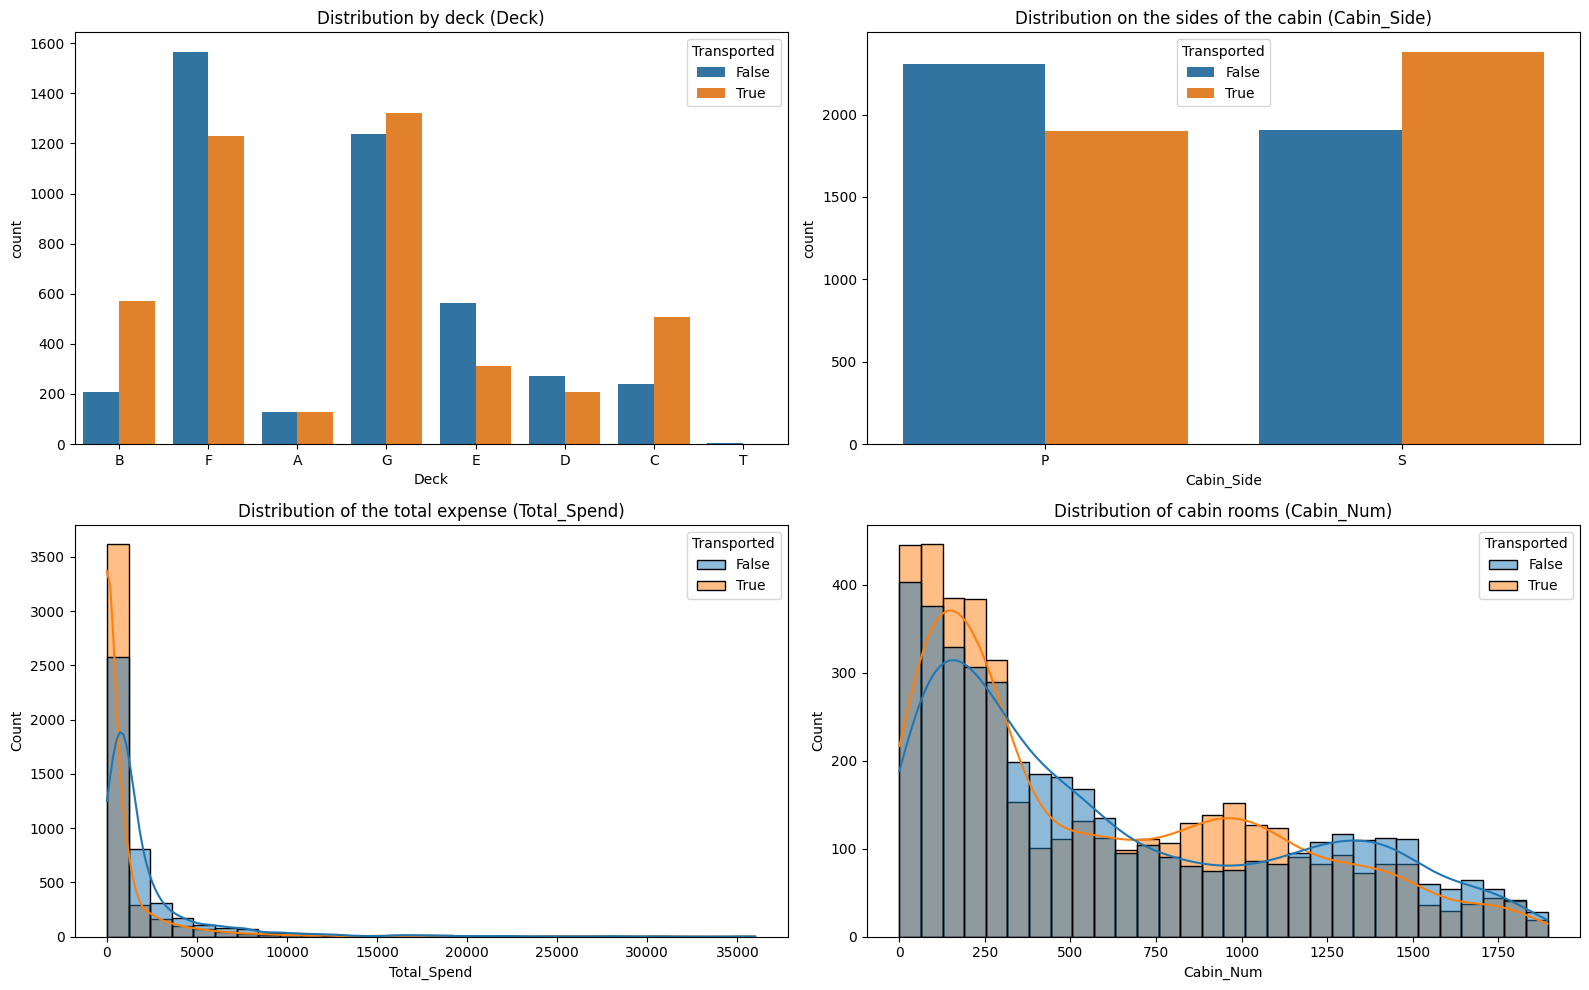

In [4]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=train_df, x='Deck', hue='Transported')
plt.title('Distribution by deck (Deck)')

plt.subplot(2, 2, 2)
sns.countplot(data=train_df, x='Cabin_Side', hue='Transported')
plt.title('Distribution on the sides of the cabin (Cabin_Side)')

plt.subplot(2, 2, 3)
sns.histplot(train_df, x='Total_Spend', bins=30, kde=True, hue='Transported')
plt.title('Distribution of the total expense (Total_Spend)')

plt.subplot(2, 2, 4)
sns.histplot(train_df, x='Cabin_Num', bins=30, kde=True, hue='Transported')
plt.title('Distribution of cabin rooms (Cabin_Num)')

plt.tight_layout()
plt.show()

**Разбиение по нахождению человек в группе (один или нет) и по количеству человек в группе**

In [5]:
train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0])
test_df['Group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0])

train_df['Group_Size'] = train_df.groupby('Group')['Group'].transform('count')
test_df['Group_Size'] = test_df.groupby('Group')['Group'].transform('count')

train_df['InGroup'] = (train_df['Group_Size'] > 1).astype(int)
test_df['InGroup'] = (test_df['Group_Size'] > 1).astype(int)

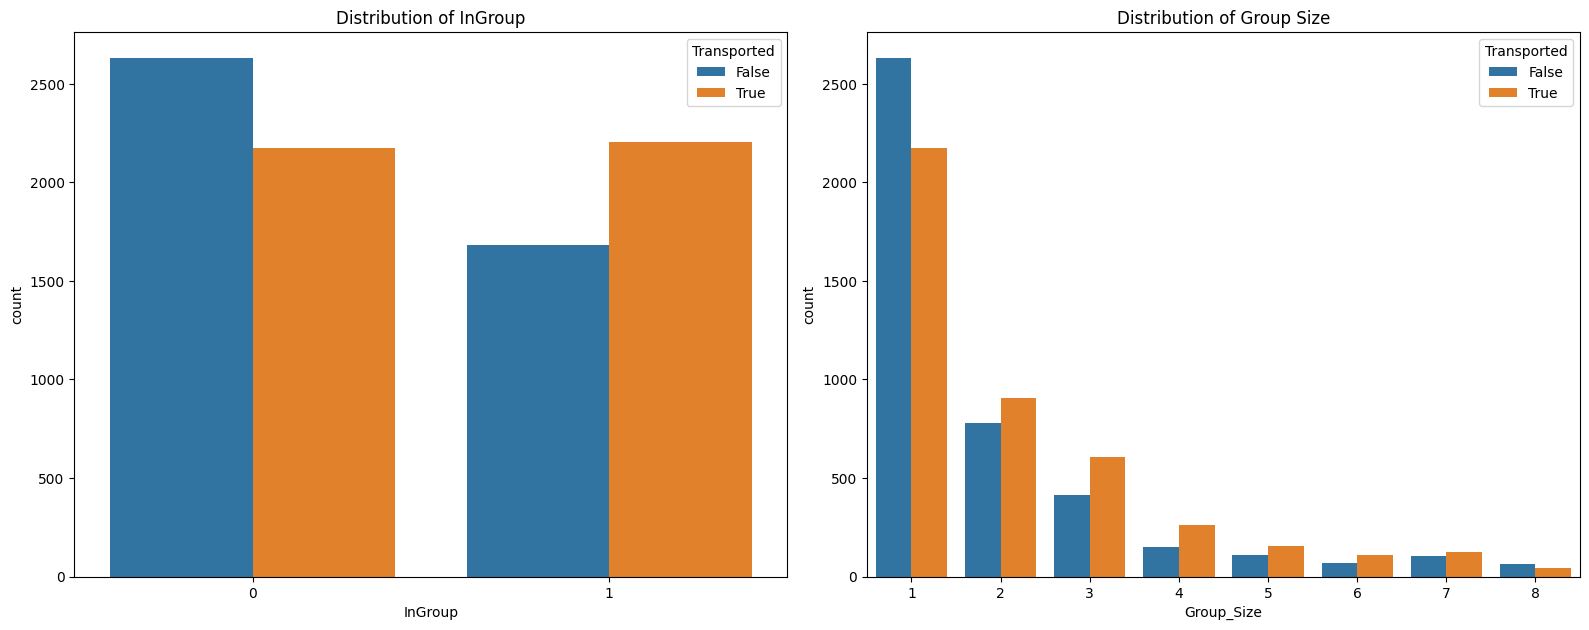

In [6]:
fig=plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.countplot(data=train_df, x='InGroup', hue='Transported')
plt.title('Distribution of InGroup')

plt.subplot(2, 2, 2)
sns.countplot(data=train_df, x='Group_Size', hue='Transported')
plt.title('Distribution of Group Size')
fig.tight_layout()

**Разбиение по наличию трат**

In [7]:
train_df['Spent_Money'] = (train_df['Total_Spend'] > 0).astype(int)
test_df['Spent_Money'] = (test_df['Total_Spend'] > 0).astype(int)

Text(0.5, 1.0, 'Distribution of Spent Money')

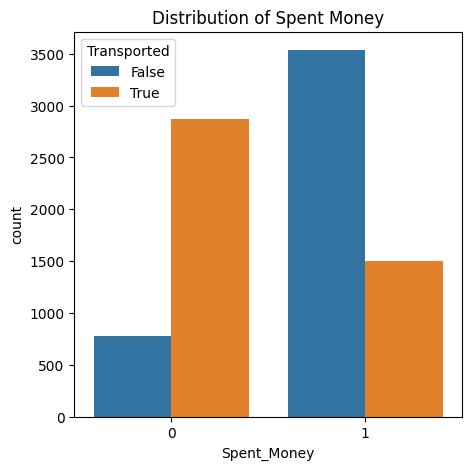

In [8]:
plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
sns.countplot(data=train_df, x='Spent_Money', hue='Transported')
plt.title('Distribution of Spent Money')

**Разбиение по нахождению в большой группе**

In [9]:
train_df['Large_Group'] = (train_df['Group_Size'] > 4).astype(int)
test_df['Large_Group'] = (test_df['Group_Size'] > 4).astype(int)

Text(0.5, 1.0, 'Distribution of Large Group')

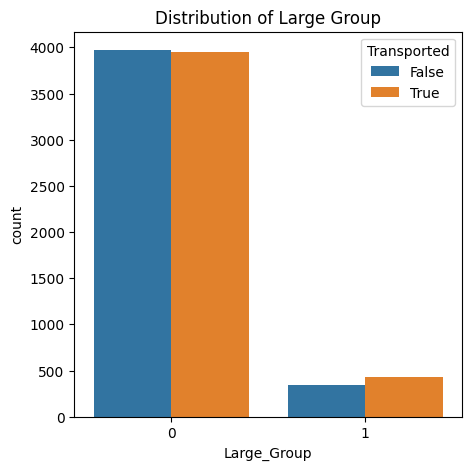

In [10]:
plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
sns.countplot(data=train_df, x='Large_Group', hue='Transported')
plt.title('Distribution of Large Group')

**Разбиение по нахождению в середине палубы**

In [11]:
train_df['Middle_Deck'] = train_df['Deck'].isin(['F', 'G', 'E']).astype(int)
test_df['Middle_Deck'] = test_df['Deck'].isin(['F', 'G', 'E']).astype(int)

Text(0.5, 1.0, 'Distribution of Middle Deck')

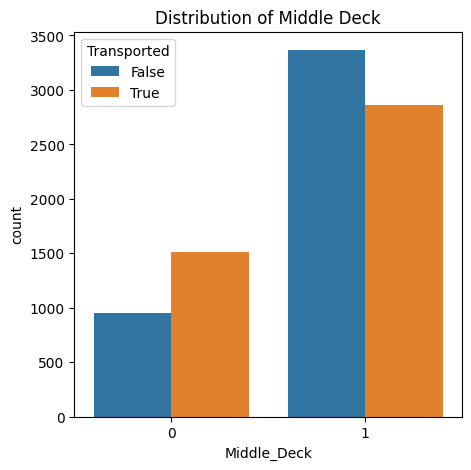

In [12]:
plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
sns.countplot(data=train_df, x='Middle_Deck', hue='Transported')
plt.title('Distribution of Middle Deck')

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Cabin_Num     8494 non-null   float64
 16  Cabin_Side    8494 non-null   object 
 17  Group         8693 non-null   object 
 18  Total_Spend   8693 non-null 

# Resume

**Из анализа выделились несколько информативных признаков, оказавших влияние на целевую переменную *Transported*, однако тенденция в том, что метки распределены равномерно. Признак *Age* показал наличие определённой зависимости: более молодые пассажиры чаще были перевезены. Анализ *Spent_Money* и *Total_Spend* также выявил тенденцию: пассажиры с околонулевыми расходами имели больше шансов на успешный транспорт. Разделение признака *Cabin* на *Deck*, *Cabin_Num* и *Cabin_Side* позволило лучше понять распределение по палубам, где оказалось, что определенные палубы имеют более высокую вероятность успешного перевоза.**